In [1]:
# Import libraries
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.saving import load_model

2023-11-04 20:12:50.396062: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-04 20:12:50.398119: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-04 20:12:50.432393: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-04 20:12:50.432424: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-04 20:12:50.432450: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
# Set directories
root_dir = os.getcwd()
data_dir = os.path.join(root_dir, "mosquitoes-dataset")
model_dir = os.path.join(root_dir, "models")
test_dir = os.path.join(root_dir, "test-dataset")

In [3]:
# Class names
class_names = os.listdir(data_dir)

In [4]:
model = load_model(os.path.join(model_dir, "mosquitoes_model.keras"))

In [5]:
IMG_DIM = 224
IMG_SIZE = (IMG_DIM, IMG_DIM)
IMG_SHAPE = IMG_SIZE + (3,)

1/1 [==============================] - 0s 16ms/step


(-0.5, 2559.5, 1919.5, -0.5)

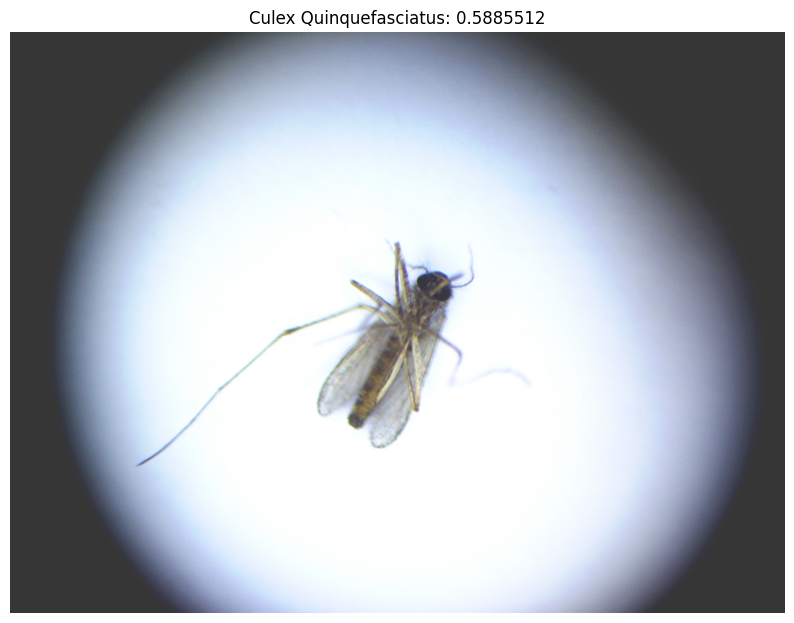

In [60]:
plt.figure(figsize=(10, 10))
img = cv2.imread(os.path.join(test_dir, 'Culex Quinquefasciatus', '0001.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
x = cv2.resize(img, IMG_SIZE, interpolation=cv2.INTER_LINEAR)
x = np.expand_dims(x/255, 0)

yhat = model.predict(x)
yhat = tf.nn.softmax(yhat[0])
yhat = np.array(yhat)

plt.imshow(img.astype('uint8'))
plt.title(class_names[np.argmax(yhat)] + ': ' + yhat[np.argmax(yhat)].astype('str'))
plt.axis("off")